---

# ¿Cuál es la mejor tarifa?

📊 Introducción

Este proyecto se desarrolla en el contexto de Megaline, un operador de telecomunicaciones que ofrece dos planes de prepago: Surf y Ultimate. El objetivo principal es ayudar al departamento comercial a identificar cuál de estas dos tarifas genera mayores ingresos, con el fin de optimizar la asignación del presupuesto publicitario.

Para ello, se llevará a cabo un análisis exploratorio de datos utilizando una muestra de 500 clientes, la cual incluye información demográfica (como ciudad de origen), el tipo de tarifa contratada, y su comportamiento durante el año 2018 en términos de llamadas realizadas y mensajes enviados.

A través de este análisis se buscará:

Comprender el uso del servicio por parte de los clientes según la tarifa.

Calcular los ingresos generados por cada cliente.

Evaluar cuál tarifa es más rentable para la empresa.

Este estudio servirá como base para tomar decisiones estratégicas informadas sobre campañas de marketing, ajustes de tarifas y orientación comercial.

## Inicialización

In [ ]:
# Cargar todas las librerías
import numpy as np
from scipy import stats as st
import pandas as pd
import math
from matplotlib import pyplot as plt

## Cargar datos

In [ ]:
# Carga los archivos de datos en diferentes DataFrames
users_df = pd.read_csv("megaline_users.csv")
calls_df = pd.read_csv("megaline_calls.csv")
messages_df = pd.read_csv("megaline_messages.csv")
internet_df = pd.read_csv("megaline_internet.csv")
plans_df = pd.read_csv("megaline_plans.csv")

## Preparar los datos

En este bloque, vamos a revisar la informacion de manera general para cada tabla, asi como analizar si cuenta con errores, como valores austenes o duplicados. En caso de encontrar este tipo de detalles, estos se van a analizar, tratar de explicar que sucedio y corregirlos para que no afecten en la intepretacion de los resultados.

## Tarifas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

print(plans_df.info())
print()
print("Valores nulos: ", plans_df.isnull().sum())
print()
print("Valores duplciados: ", plans_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None

Valores nulos:  messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Valores duplciados:  0


In [ ]:
# Imprime una muestra de los datos para las tarifas

display(plans_df.head())



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Para analizar la tabla de los Planes [plans_df], se realizo un muestra de su informacion con el (metodo .info()). Esta tabla no muestra valores nulos (metodo .isnull().sum()), los datos se encuentran con los tipios de datos adecuados y no encontramos valores duplicados (metodo .duplicated().sum()).

Los valores de la primera fila indica el plan "Surf" y la segunda "Ultimate". ambas tienen valores incorrectos en la columna de mg incluidos por mes, 15360 y 30720 respectivamente.

Vamos a corregir estos datos directamente desde la columna en la celda a continuacion.

## Corregir datos

Cambiamos el valor de los mb por mes de 15360 y 30750 a 15000 y 30000 correspondientemente y asi poder analizar la infomracion partiendo de los datos correctos.


In [ ]:
display(plans_df.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Enriquecer los datos

## Usuarios/as

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(users_df.info())
print()
print("Valores nulos: ", users_df.isnull().sum())
print()
print("Valores duplciados: ", users_df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

Valores nulos:  user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Valores duplciados:  0


In [ ]:
# Imprime una muestra de datos para usuarios
display(users_df.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN



El datafranme de usuarios no cuenta con valores duplicados, sin embargo, si tiene valores ausentes que se presentan en la columna "churn_date", pero esto no es un problema ya que, aunque tenga valores ausentes, los usuarios no han cancelado su servicio.
Lo que si podemos arreglar, son las columnas que nos muestran fechas, ya que ambas tienen un tipo de datos "object" y la cambiaremos a datetime para que sea coherente.


### Corregir los datos

Vamos a cambiar el tipo de dato "object" de [reg_date, churn_date] a "dateime" para ser coherentes con la informacion.

In [ ]:
users_df["reg_date"] = pd.to_datetime(users_df["reg_date"], format = '%Y-%m-%d')
users_df["churn_date"] = pd.to_datetime(users_df["churn_date"], format = '%Y-%m-%d')

print(users_df.dtypes)

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object


### Enriquecer los datos

Aunque existan valores ausentes en la columna "churn_date", no es un porblema ya que estos usuarios siguen activos.

Validamos el formato de las fechas:

In [ ]:
display(users_df["reg_date"].head())
display(users_df["churn_date"].head())

0   2018-12-24
1   2018-08-13
2   2018-10-21
3   2018-01-28
4   2018-05-23
Name: reg_date, dtype: datetime64[ns]

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: churn_date, dtype: datetime64[ns]

## Llamadas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

print(calls_df.info())
print()
print("Valores nulos: ", calls_df.isnull().sum())
print()
print("Valores duplciados: ", calls_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

Valores nulos:  id           0
user_id      0
call_date    0
duration     0
dtype: int64

Valores duplciados:  0


In [ ]:
# Imprime una muestra de datos para las llamadas
display(calls_df.head())


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


El dataframe de Llamadas [calls_df] no cuenta con valores nulos y tampoco con duplicados. 
Sin embargo, podemos hacer un cambio en el tipo de dato para la columna "call_date", de "object" a "datetime".
Y tambien redondearemos la duracion de las llamadas con el metodo math.ceil, para que el valor se redondee siempre hacia arriba, segun indicaciones del caso.

### Corregir los datos

En este espacio cambiamos el tipo de dato de la columna [call_date] de "object" a "datetime".

Cambiamos el tipo de dato de la duracion a entero y a su vez tambien hicimos que se redondeara hacia arriba, segun las politicas de la empresa.

In [ ]:
calls_df["call_date"] = pd.to_datetime(calls_df["call_date"], format = '%Y-%m-%d')

print("Nuevo tipo de datos para la columna [call_date]:",calls_df["call_date"].dtypes)
print()
calls_df["duration"] = np.ceil(calls_df["duration"]).astype(int)
print(calls_df.dtypes)
display(calls_df.head())

Nuevo tipo de datos para la columna [call_date]: datetime64[ns]

id                   object
user_id               int64
call_date    datetime64[ns]
duration              int64
dtype: object


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


## Mensajes

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

print(messages_df.info())
print()
print("Valores nulos: ", messages_df.isnull().sum())
print()
print("Valores duplciados: ", messages_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

Valores nulos:  id              0
user_id         0
message_date    0
dtype: int64

Valores duplciados:  0


In [ ]:
# Imprime una muestra de datos para los mensajes
display(messages_df.head())


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


El dataframe de Mensajes [messages_df] no cuenta con valores nulos ni duplicados.

La fecha tiene el tipo de dato "object" y se cambiara a un tipo de dato "datetime".

### Corregir los datos

Cambiamos el tipo de dato de la fecha a "datetime" con pd.tp_datetime() especificando la columna.

In [ ]:
messages_df["message_date"] = pd.to_datetime(messages_df["message_date"], format = '%Y-%m-%d')

print(messages_df.dtypes)

id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object


## Internet

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de internet

print(internet_df.info())
print()
print("Valores nulos: ", internet_df.isnull().sum())
print()
print("Valores duplciados: ", internet_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None

Valores nulos:  id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

Valores duplciados:  0


In [ ]:
# Imprime una muestra de datos para el tráfico de internet

display(internet_df.head())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


El dataframe de Internet [internet_df] no cuenta con valores nulos ni duplicados.

La fecha tiene el tipo de dato "object" y se cambiara a un tipo de dato "datetime".

Tambien tiene el uso de megabites como "float".

### Corregir los datos

Vamos a corregir el tipo de dato de la fecha y el tipo de dato del consumo de megas. Se van a cambiar a "datetime" y "int" conrrespondientemente. Y por otro lado, tambien vamos a redondear los valores de los megas consumidos, segun las politicas de la empresa.

In [ ]:
internet_df["session_date"] = pd.to_datetime(internet_df["session_date"], format = '%Y-%m-%d')
#internet_df["mb_used"] = np.ceil(internet_df["mb_used"]).astype(int)

print(internet_df.dtypes)
display(internet_df.head())

id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


## Estudiar las condiciones de las tarifas

Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción.

In [ ]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
display(plans_df)

#Plan "Surf" al mes:
# Mensajes incluidos: 50
# MG incluidos: 15000
# Minutos incluidos: 500
# Precio en dolares (usd): $20
# USD extra por minutos: $0.3
# USD extra por mensaje: $.03
# USD extra por GB: $10

#Plan "Ultimate" al mes:
# Mensajes incluidos: 1000
# MG incluidos: 30000
# Minutos incluidos: 3000
# Precio en dolares (usd): $70
# USD extra por minutos: $0.1
# USD extra por mensaje: $.01
# USD extra por GB: $7

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

Ahora que los datos están limpios, agregamos los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.

In [ ]:
# Calcula el número de llamadas hechas por cada usuario al mes. 
calls_df["month"] = calls_df["call_date"].dt.to_period("M")
llamadas_mensuales = calls_df.groupby(["user_id","month"]).agg(llamadas=("id","count")).reset_index()
display(llamadas_mensuales.head(20))



,user_id,month,llamadas
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64
5,1001,2018-12,56
6,1002,2018-10,11
7,1002,2018-11,55
8,1002,2018-12,47
9,1003,2018-12,149


In [ ]:
# Calcula la cantidad de minutos usados por cada usuario al mes. 
minutos_mensuales = calls_df.groupby(["user_id", "month"]).agg(minutos=("duration","sum")).reset_index()
display(minutos_mensuales.head(20))

,user_id,month,minutos
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426
5,1001,2018-12,412
6,1002,2018-10,59
7,1002,2018-11,386
8,1002,2018-12,384
9,1003,2018-12,1104


In [ ]:
# Calcula el número de mensajes enviados por cada usuario al mes. 
messages_df["month"] = messages_df["message_date"].dt.to_period("M")
mensajes_mensuales = messages_df.groupby(["user_id", "month"]).agg(mensajes =("id", "count")).reset_index()
display(mensajes_mensuales.head(20))


,user_id,month,mensajes
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
5,1001,2018-12,44
6,1002,2018-10,15
7,1002,2018-11,32
8,1002,2018-12,41
9,1003,2018-12,50


In [ ]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. 
internet_df["month"] = internet_df["session_date"].dt.to_period("M")
trafico_mensual = internet_df.groupby(["user_id", "month"]).agg(trafico_mb = ("mb_used", "sum")).reset_index()

display(trafico_mensual.head(20))

,user_id,month,trafico_mb
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30
5,1001,2018-12,19369.18
6,1002,2018-10,6552.01
7,1002,2018-11,19345.08
8,1002,2018-12,14396.24
9,1003,2018-12,27044.14


Se junto los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.

In [ ]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

consumo_mensual = pd.merge(llamadas_mensuales, minutos_mensuales, on = ["user_id","month"], how = "outer")
consumo_mensual = pd.merge(consumo_mensual, mensajes_mensuales, on = ["user_id", "month"], how = "outer")
consumo_mensual = pd.merge(consumo_mensual, trafico_mensual, on = ["user_id", "month"], how = "outer")

display(consumo_mensual.head(20))
print()
print(consumo_mensual.isnull().sum())
consumo_mensual.fillna(0, inplace = True)
print()
print(consumo_mensual.isnull().sum())
print()
consumo_mensual["llamadas"] = consumo_mensual["llamadas"].astype(int)
consumo_mensual["minutos"] = consumo_mensual["minutos"].astype(int)
consumo_mensual["mensajes"] = consumo_mensual["mensajes"].astype(int)
consumo_mensual["trafico_mb"] = consumo_mensual["trafico_mb"].astype(int)


,user_id,month,llamadas,minutos,mensajes,trafico_mb
0,1000,2018-12,16.0,124.0,11.0,1901.47
1,1001,2018-08,27.0,182.0,30.0,6919.15
2,1001,2018-09,49.0,315.0,44.0,13314.82
3,1001,2018-10,65.0,393.0,53.0,22330.49
4,1001,2018-11,64.0,426.0,36.0,18504.30
5,1001,2018-12,56.0,412.0,44.0,19369.18
6,1002,2018-10,11.0,59.0,15.0,6552.01
7,1002,2018-11,55.0,386.0,32.0,19345.08
8,1002,2018-12,47.0,384.0,41.0,14396.24
9,1003,2018-12,149.0,1104.0,50.0,27044.14



user_id         0
month           0
llamadas       35
minutos        35
mensajes      487
trafico_mb     16
dtype: int64

user_id       0
month         0
llamadas      0
minutos       0
mensajes      0
trafico_mb    0
dtype: int64




Se usa el merge de tipo outer para evitar perder datos de usuarios.

In [ ]:
# Añade la información de la tarifa
consumo_mensual = pd.merge(consumo_mensual, users_df[["user_id","plan","city"]], on = "user_id", how = "left")




Se usó "left" ya que la data de consumo de usuarios ya esta comnpleta.


In [ ]:

display(consumo_mensual.head(20))
consumo_mensual.info()

,user_id,month,llamadas,minutos,mensajes,trafico_mb,plan,city
0,1000,2018-12,16,124,11,1901,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,2018-08,27,182,30,6919,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,2018-09,49,315,44,13314,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,2018-10,65,393,53,22330,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,2018-11,64,426,36,18504,surf,"Seattle-Tacoma-Bellevue, WA MSA"
5,1001,2018-12,56,412,44,19369,surf,"Seattle-Tacoma-Bellevue, WA MSA"
6,1002,2018-10,11,59,15,6552,surf,"Las Vegas-Henderson-Paradise, NV MSA"
7,1002,2018-11,55,386,32,19345,surf,"Las Vegas-Henderson-Paradise, NV MSA"
8,1002,2018-12,47,384,41,14396,surf,"Las Vegas-Henderson-Paradise, NV MSA"
9,1003,2018-12,149,1104,50,27044,surf,"Tulsa, OK MSA"


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   user_id     2293 non-null   int64    
 1   month       2293 non-null   period[M]
 2   llamadas    2293 non-null   int64    
 3   minutos     2293 non-null   int64    
 4   mensajes    2293 non-null   int64    
 5   trafico_mb  2293 non-null   int64    
 6   plan        2293 non-null   object   
 7   city        2293 non-null   object   
dtypes: int64(5), object(2), period[M](1)
memory usage: 161.2+ KB


Se calcula los ingresos mensuales por usuario (restando el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas).

In [ ]:
# Calcula el ingreso mensual para cada usuario
#
ingreso_mensual = consumo_mensual.merge(plans_df, left_on = "plan", right_on = "plan_name", how = "left")


In [ ]:
ingreso_mensual["extra_minutos"] = (ingreso_mensual["minutos"] - ingreso_mensual["minutes_included"]).clip(lower = 0)
ingreso_mensual["extra_mensajes"] = (ingreso_mensual["mensajes"] - ingreso_mensual["messages_included"]).clip(lower = 0)
ingreso_mensual["extra_mb"] = (ingreso_mensual["trafico_mb"] - ingreso_mensual["mb_per_month_included"]).clip(lower = 0)

ingreso_mensual["costo_extra_minutos"] = ingreso_mensual["extra_minutos"] * ingreso_mensual["usd_per_minute"]
ingreso_mensual["costo_extra_mensajes"] = ingreso_mensual["extra_mensajes"] * ingreso_mensual["usd_per_message"]
ingreso_mensual["costo_extra_mb"] = (ingreso_mensual["extra_mb"]/1024).apply(np.ceil) * ingreso_mensual["usd_per_gb"]

ingreso_mensual["ingreso_mensual"] = ingreso_mensual["usd_monthly_pay"] + ingreso_mensual["costo_extra_minutos"] + ingreso_mensual["costo_extra_mensajes"] + ingreso_mensual["costo_extra_mb"]

display(ingreso_mensual.head(20))

,user_id,month,llamadas,minutos,mensajes,trafico_mb,plan,city,messages_included,mb_per_month_included,...,usd_per_message,usd_per_minute,plan_name,extra_minutos,extra_mensajes,extra_mb,costo_extra_minutos,costo_extra_mensajes,costo_extra_mb,ingreso_mensual
0,1000,2018-12,16,124,11,1901,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,...,0.01,0.01,ultimate,0,0,0,0.00,0.00,0.0,70.00
1,1001,2018-08,27,182,30,6919,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,...,0.03,0.03,surf,0,0,0,0.00,0.00,0.0,20.00
2,1001,2018-09,49,315,44,13314,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,...,0.03,0.03,surf,0,0,0,0.00,0.00,0.0,20.00
3,1001,2018-10,65,393,53,22330,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,...,0.03,0.03,surf,0,3,6970,0.00,0.09,70.0,90.09
4,1001,2018-11,64,426,36,18504,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,...,0.03,0.03,surf,0,0,3144,0.00,0.00,40.0,60.00
5,1001,2018-12,56,412,44,19369,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,...,0.03,0.03,surf,0,0,4009,0.00,0.00,40.0,60.00
6,1002,2018-10,11,59,15,6552,surf,"Las Vegas-Henderson-Paradise, NV MSA",50,15360,...,0.03,0.03,surf,0,0,0,0.00,0.00,0.0,20.00
7,1002,2018-11,55,386,32,19345,surf,"Las Vegas-Henderson-Paradise, NV MSA",50,15360,...,0.03,0.03,surf,0,0,3985,0.00,0.00,40.0,60.00
8,1002,2018-12,47,384,41,14396,surf,"Las Vegas-Henderson-Paradise, NV MSA",50,15360,...,0.03,0.03,surf,0,0,0,0.00,0.00,0.0,20.00
9,1003,2018-12,149,1104,50,27044,surf,"Tulsa, OK MSA",50,15360,...,0.03,0.03,surf,604,0,11684,18.12,0.00,120.0,158.12


## Estudia el comportamiento de usuario

Se calculan algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Y presentan gráficos útiles para facilitar la comprensión. Dado que que el objetivo principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas se calculan por tarifa.

### Llamadas

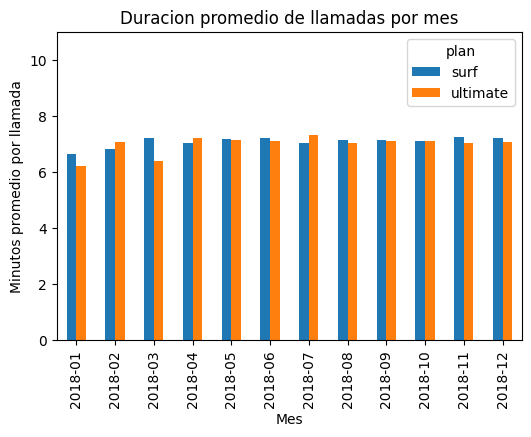

In [ ]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
consumo_mensual["mins_promedio_llamada"] = consumo_mensual["minutos"]/consumo_mensual["llamadas"]
tiempo_prom_llamadas = consumo_mensual.groupby(["month","plan"])["mins_promedio_llamada"].mean().unstack()
tiempo_prom_llamadas.plot(kind = "bar",
                          xlabel = "Mes",
                          ylabel = "Minutos promedio por llamada",
                          title = "Duracion promedio de llamadas por mes",
                          figsize = [6,4],
                          ylim = (0,11)
                         )
plt.show()


Observamos que en los meses recientes el consumo promedio se iguala.


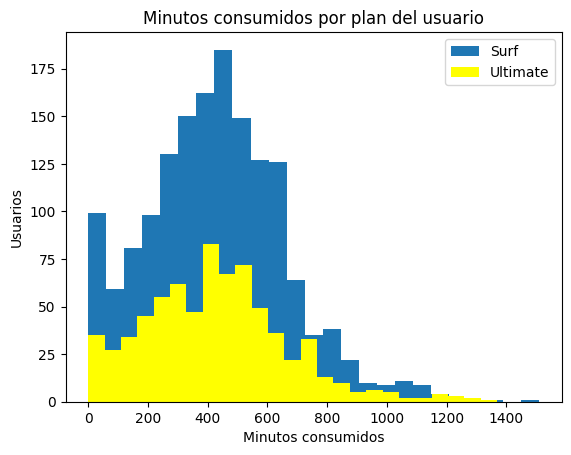

In [ ]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

surf = consumo_mensual[consumo_mensual["plan"] == "surf"]
ultimate = consumo_mensual[consumo_mensual["plan"] == "ultimate"]

surf["minutos"].plot(kind = "hist",
                     bins = 25,
                     title = "Minutos consumidos por plan del usuario",
                     legend = "Surf"
                    )
ultimate["minutos"].plot(kind = "hist",
                        bins = 25,
                        color = "yellow",
                        legend = "Ultimate"
                        )
plt.ylabel("Usuarios")
plt.xlabel("Minutos consumidos")
plt.legend(["Surf","Ultimate"])
plt.show()


Las distribuciones son más o menos similares, pero surf está más concentrado

Se calcula el promedio/media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.

In [ ]:
# Calcula la media y la varianza de la duración mensual de llamadas.
media_minutos_surf = surf["minutos"].mean()
var_minutos_surf = np.var(surf["minutos"])
std_minutos_surf = np.sqrt(var_minutos_surf)

media_minutos_ulti = ultimate["minutos"].mean()
var_minutos_ulti = np.var(ultimate["minutos"])
std_minutos_ulti = np.sqrt(var_minutos_ulti)

print(f"La media de los minutos para el plan 'Surf' es de: {media_minutos_surf.round(2)}")
print(f"La variacion de los minutos para el plan 'Surf' es de: {var_minutos_surf.round(2)}")
print(f"La desviacion estandar de los minutos del plan 'Surf' es de: {std_minutos_surf.round(2)}")
print()
print(f"La media de los minutos para el plan 'Ultimate' es de: {media_minutos_ulti.round(2)}")
print(f"La variacion de los minutos para el plan 'Ultimate' es de: {var_minutos_ulti.round(2)}")
print(f"La desviacion estandar de los minutos del plan 'Ultimate' es de: {std_minutos_ulti.round(2)}")


La media de los minutos para el plan 'Surf' es de: 428.75
La variacion de los minutos para el plan 'Surf' es de: 54933.33
La desviacion estandar de los minutos del plan 'Surf' es de: 234.38

La media de los minutos para el plan 'Ultimate' es de: 430.45
La variacion de los minutos para el plan 'Ultimate' es de: 57764.13
La desviacion estandar de los minutos del plan 'Ultimate' es de: 240.34


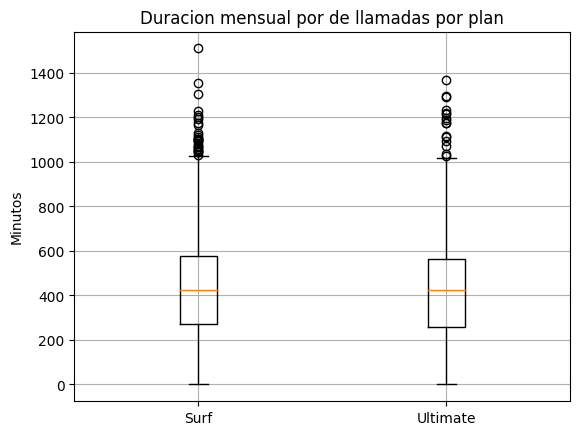

<Figure size 800x500 with 0 Axes>

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.title("Duracion mensual por de llamadas por plan")
plt.boxplot([surf["minutos"], ultimate["minutos"]],
           labels = ["Surf", "Ultimate"]            
           )
plt.ylabel("Minutos")
plt.grid(True)
plt.figure(figsize = (8,5))


plt.show()

En realidad ambos planes son similares en consumo de llamadas.

In [ ]:
print("Estadisticos del plan 'Surf':\n",surf["minutos"].describe().round(2))
print()
print("Estadisticos del plan 'Ultimate':\n",ultimate["minutos"].describe().round(2))
print()
print(plans_df.head())

Estadisticos del plan 'Surf':
 count    1573.00
mean      428.75
std       234.45
min         0.00
25%       272.00
50%       425.00
75%       576.00
max      1510.00
Name: minutos, dtype: float64

Estadisticos del plan 'Ultimate':
 count     720.00
mean      430.45
std       240.51
min         0.00
25%       260.00
50%       424.00
75%       565.25
max      1369.00
Name: minutos, dtype: float64

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Conclusiones

Podemos observar que del comportamiento de los usuarios, los usuarios del plan "surf" en promedio utilizan casi todo los minutos que incluye su paquete y casi el 50% de ellos superan el limite de minutos por mes. En cambio, los usuarios del paquete "ultimate", en promedio, utilizan la misma cantidad de minutos al mes, teniendo en cuenta que su limite es de 3000 minutos.

Podemos observar que los usuarios del plan "surf" consumen mas minutos en sus llamadas que los usuarios del plan "ultimate"

### Mensajes

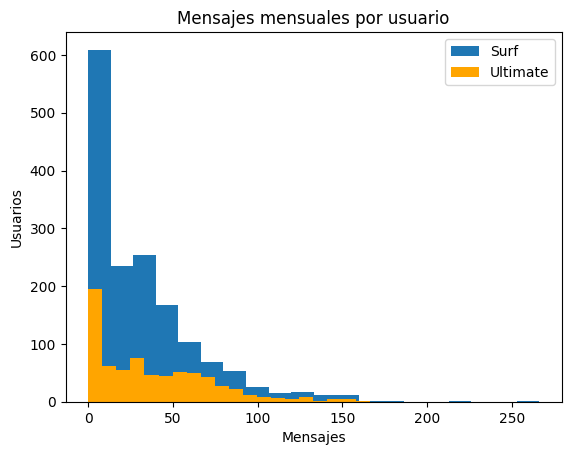

In [ ]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
surf["mensajes"].plot(kind= "hist",
                     bins = 20)
ultimate["mensajes"].plot(kind = "hist",
                         bins = 20,
                         color = "orange")
plt.xlabel("Mensajes")
plt.ylabel("Usuarios")
plt.title("Mensajes mensuales por usuario")
plt.legend(["Surf","Ultimate"])
plt.show()

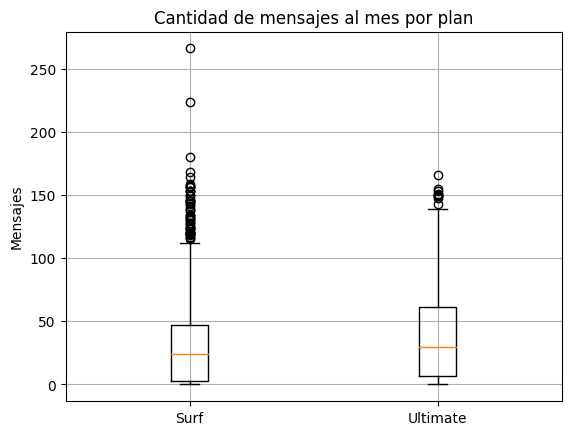

<Figure size 800x500 with 0 Axes>

In [ ]:
plt.title("Cantidad de mensajes al mes por plan")
plt.boxplot([surf["mensajes"], ultimate["mensajes"]],
           labels = ["Surf", "Ultimate"]            
           )
plt.ylabel("Mensajes")
plt.grid(True)
plt.figure(figsize = (8,5))


plt.show()

In [ ]:
# Imprimimos lo valores estadisticos sobre los mensajes de ambos planes.
print(surf["mensajes"].describe().round(2))
print()
print(ultimate["mensajes"].describe().round(2))

count    1573.00
mean       31.16
std        33.57
min         0.00
25%         3.00
50%        24.00
75%        47.00
max       266.00
Name: mensajes, dtype: float64

count    720.00
mean      37.55
std       34.77
min        0.00
25%        7.00
50%       30.00
75%       61.00
max      166.00
Name: mensajes, dtype: float64


# Conclusiones

El comportamiento de los datos de los mensjaes indica que los usuarios del plan "Surf" tienden a mandar mas mensajes que los del plan

Envío promedio mayor en Ultimate:

Los usuarios del plan Ultimate envían en promedio más mensajes por mes (37.55) que los del plan Surf (31.16), lo cual sugiere un uso más intensivo del servicio de mensajería.

Distribución más alta en todos los percentiles en Ultimate:

En todos los percentiles (25%, 50%, 75%), los usuarios de Ultimate superan a los de Surf.

Por ejemplo, el 75% de los usuarios de Ultimate envían hasta 61 mensajes, mientras que el 75% de los de Surf solo envían hasta 47.

Mayor variabilidad en ambos planes:

La desviación estándar en ambos casos es alta , lo que indica una gran dispersión en el comportamiento de los usuarios respecto al envío de mensajes.

Posible uso de mensajes en Surf:

Dado que Surf tiene más usuarios, pero un promedio y mediana menores, es posible que una parte significativa de sus usuarios no aproveche intensamente el servicio de mensajería, en contraste con Ultimate, que podría atraer a usuarios más comunicativos.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 1 to 2289
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   user_id                1573 non-null   int64    
 1   month                  1573 non-null   period[M]
 2   llamadas               1573 non-null   int64    
 3   minutos                1573 non-null   int64    
 4   mensajes               1573 non-null   int64    
 5   trafico_mb             1573 non-null   int64    
 6   plan                   1573 non-null   object   
 7   city                   1573 non-null   object   
 8   mins_promedio_llamada  1545 non-null   float64  
dtypes: float64(1), int64(5), object(2), period[M](1)
memory usage: 122.9+ KB
None


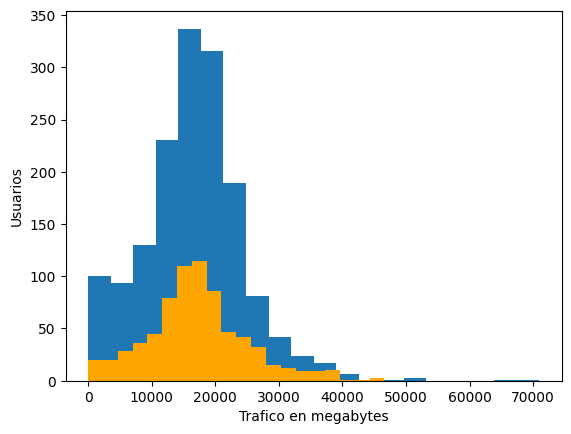

In [ ]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
print(surf.info())
surf["trafico_mb"].plot(kind = "hist",
                       bins=20
                       )
ultimate["trafico_mb"].plot(kind="hist",
                           bins= 20,
                           color = "orange"
                           )

plt.ylabel("Usuarios")
plt.xlabel("Trafico en megabytes")
                       
plt.show()

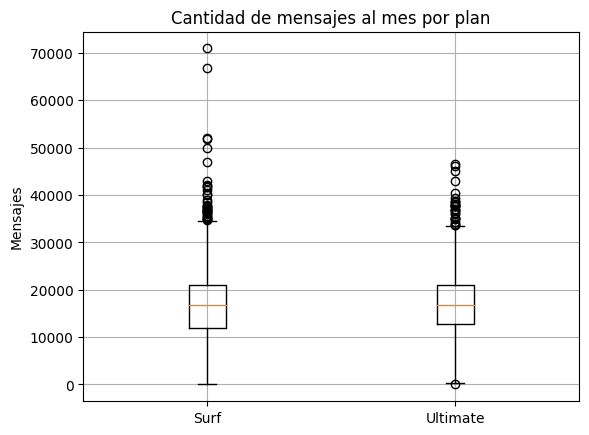

<Figure size 800x500 with 0 Axes>

In [ ]:
plt.title("Cantidad de mensajes al mes por plan")
plt.boxplot([surf["trafico_mb"], ultimate["trafico_mb"]],
           labels = ["Surf", "Ultimate"]            
           )
plt.ylabel("Mensajes")
plt.grid(True)
plt.figure(figsize = (8,5))


plt.show()

### Internet

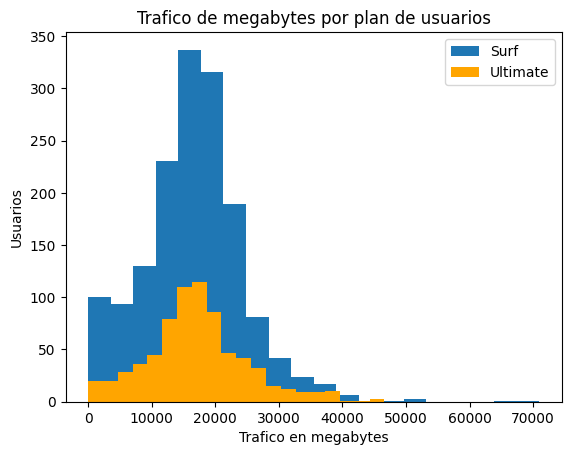

In [ ]:
surf["trafico_mb"].plot(kind = "hist",
                       bins = 20,
                       xlabel="Trafico en megabytes",
                       ylabel= "Usuarios")
ultimate["trafico_mb"].plot(kind = "hist",
                           bins = 20,
                           color = "orange")

plt.title("Trafico de megabytes por plan de usuarios")
plt.legend(["Surf","Ultimate"])
plt.xlabel("Trafico en megabytes")
plt.ylabel("Usuarios")

plt.show()

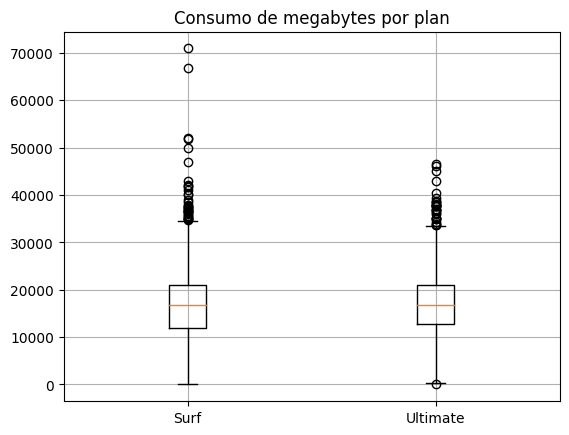

In [ ]:
plt.title("Consumo de megabytes por plan")
plt.boxplot([surf["trafico_mb"], ultimate["trafico_mb"]],
           labels=["Surf", "Ultimate"])
plt.grid(True)
plt.show()

In [ ]:
# Se muestran los datos estadisticos sobre el uso de megabytes de ambos planes.
print(surf["trafico_mb"].describe().round(2),"\n")
print(ultimate["trafico_mb"].describe().round(2))

count     1573.00
mean     16557.79
std       8013.49
min          0.00
25%      11986.00
50%      16829.00
75%      20999.00
max      70931.00
Name: trafico_mb, dtype: float64 

count      720.00
mean     17214.21
std       7851.88
min          0.00
25%      12666.50
50%      16858.00
75%      21013.75
max      46595.00
Name: trafico_mb, dtype: float64


# Conclusiones

Los usuarios de Ultimate consumen ligeramente más datos:

Aunque la diferencia no es extrema, los usuarios del plan Ultimate presentan un promedio ligeramente superior de tráfico (17,214 MB) frente a Surf (16,557 MB).

Distribución muy similar en ambos planes:

Las medianas son casi iguales (~16,800 MB), lo que indica que la mayoría de los usuarios tienen comportamientos similares, independientemente del plan.

Sin embargo, Ultimate tiene una distribución un poco más concentrada, como lo sugiere su desviación estándar ligeramente menor.

El plan Surf tiene más usuarios extremos:

El valor máximo en Surf (70,931 MB) es significativamente más alto que en Ultimate (46,595 MB).

Esto puede indicar que hay algunos usuarios de Surf que sobrepasan el límite del plan y pagan cargos extra, lo que podría influir en la rentabilidad del plan.

Posible sobreuso en Surf:

Dado que Surf es el plan más limitado, es probable que los usuarios que consumen muchos datos generen ingresos adicionales por excedente, a diferencia de Ultimate donde los usuarios suelen estar dentro del límite del plan.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [ ]:
ingreso_surf = ingreso_mensual[ingreso_mensual["plan"] == "surf"]
ingreso_ultimate = ingreso_mensual[ingreso_mensual["plan"] == "ultimate"]

print(ingreso_surf["ingreso_mensual"].describe().round())
print("\n__________________________________________________________\n")
print(ingreso_ultimate["ingreso_mensual"].describe().round())

count    1573.0
mean       61.0
std        55.0
min        20.0
25%        20.0
50%        40.0
75%        80.0
max       590.0
Name: ingreso_mensual, dtype: float64

__________________________________________________________

count    720.0
mean      72.0
std       11.0
min       70.0
25%       70.0
50%       70.0
75%       70.0
max      182.0
Name: ingreso_mensual, dtype: float64


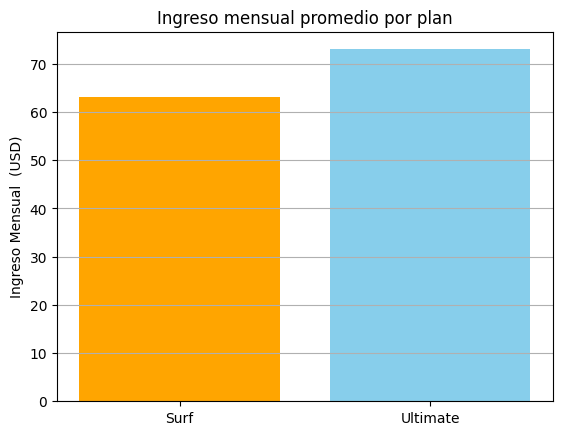

In [ ]:
ingreso_mensual_surf_prom = 63
ingreso_mensual_ulti_prom = 73

plt.bar(["Surf","Ultimate"], [ingreso_mensual_surf_prom, ingreso_mensual_ulti_prom], color = ["orange", "skyblue"])
plt.title("Ingreso mensual promedio por plan")
plt.ylabel("Ingreso Mensual  (USD)")
plt.grid(axis = "y")
plt.show()

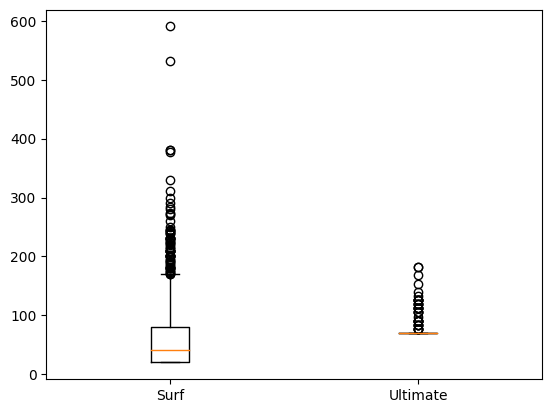

In [ ]:
plt.boxplot([ingreso_surf["ingreso_mensual"], ingreso_ultimate["ingreso_mensual"]],
            labels=["Surf", "Ultimate"])
plt.show()

# SURF

Este plan tiende a a consumir más por lo que aumenta considerablemente lo que tiene que pagar el cliente en relación a lo que cuesta su plan. Entre los ingresos que estos usuarios generan, tiene a variar en 56 (usd),  debido  a  que  su  pago  mensual  deberia  ser  de  20 (usd) y hay dato de un usuario que llego a pagar hasta 590. Y el 50% de sus clientes, pagan al rededor de 67 (usd) en su mensualidad.

# ULTIMATE

Lo clientes con este plan pagan en promedio 70 (usd) y el 50% de ellos pagan la misma cantidad, estos clientes tienen una variacion en su pago de 12 y un usuario con un pago maximo de 189 (usd). Parecen ser unos consumidores  moderados en relacion a su plan.

Vemos que los planes se diferencian en el ingreso, a pesar de que el consumo de sus usuarios es muy similar. Esto ocurre porque la estructura de costos de cada plan define intervalos de consumo diferentes, para surf los usuarios tienden a salirse de esos rangos pero los de ultimate no.

## Prueba las hipótesis estadísticas

Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.

In [ ]:
# Prueba las hipótesis
# H0: No hay una diferencia significativa en los ingresos promedios por plan.
#H1: Hay una diferencia significativa en los promedios dependiendo el plan.

#ingreso_surf = ingreso_mensual[ingreso_mensual["plan"] == "surf"]["ingreso_mensual"]
#ingreso_ultimate = ingreso_mensual[ingreso_mensual["plan"] == "ultimate"]["ingreso_mensual"]
ingreso_user_surf = ingreso_surf["ingreso_mensual"]
ingreso_user_ultimate = ingreso_ultimate["ingreso_mensual"]

alpha = .05

resultados = st.ttest_ind(ingreso_user_surf, ingreso_user_ultimate) 

if resultados.pvalue < alpha:
    print("Rechazamos H0: Hay una diferencia significativa en los ingresos promedio.")
else:
    print("No se rechaza H0: No hay evidencia de una diferencia significativa en los ingresos promedio.")

Rechazamos H0: Hay una diferencia significativa en los ingresos promedio.


Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

In [ ]:
# Prueba las hipótesis
ingreso_NY_NJ = ingreso_mensual[ingreso_mensual["city"].str.contains("NY-NJ")]["ingreso_mensual"]
ingreso_otras_regiones = ingreso_mensual[~ingreso_mensual["city"].str.contains("NY-NJ")]["ingreso_mensual"]

alpha = .05

resultados = st.ttest_ind(ingreso_NY_NJ, ingreso_otras_regiones) 

if resultados.pvalue < alpha:
    print("Rechazamos H0: Hay una diferencia significativa en los ingresos promedio.")
else:
    print("No se rechaza H0: No hay evidencia de una diferencia significativa en los ingresos promedio.")
    
print()
print("El promedio de ingreo en la ciudad NY-NJ es de:", ingreso_NY_NJ.mean().round(2))
print("El promedio de ingreo en otras regiones es de:", ingreso_otras_regiones.mean().round(2))
print()
print("Podemos observar que hay una diferencia significativa entre los ingresos de NY-NJ y el resto de las regiones.")

Rechazamos H0: Hay una diferencia significativa en los ingresos promedio.

El promedio de ingreo en la ciudad NY-NJ es de: 59.92
El promedio de ingreo en otras regiones es de: 65.21

Podemos observar que hay una diferencia significativa entre los ingresos de NY-NJ y el resto de las regiones.


## Conclusión general

Ingreso promedio por usuario: $63

Significativamente mayor al costo base del plan.

Minutos promedio: 428.75

Mensajes promedio: 31.16

Tráfico promedio: 16,577.76 MB

Conclusión:
Los usuarios del plan Surf tienden a exceder los límites incluidos, lo que genera ingresos adicionales para la compañía. Este plan puede parecer atractivo por su bajo costo, pero para muchos usuarios termina siendo más caro por los cargos extra.

Ingreso promedio por usuario: $70

Prácticamente igual al costo base, sin generar cargos adicionales.

Minutos promedio: 430.45

Mensajes promedio: 37.55

Tráfico promedio: 17,234.64 MB

Conclusión:
Los usuarios del plan Ultimate suelen estar bien cubiertos con los servicios incluidos, evitando cargos adicionales. Aunque el costo mensual es más alto, ofrece mayor previsibilidad y estabilidad en los pagos.

Ambos grupos de usuarios tienen consumos similares en minutos, mensajes y tráfico.

La diferencia está en que los del plan Surf pagan más de lo esperado porque exceden los límites, mientras que los del plan Ultimate no exceden y pagan lo pactado.

Desde una perspectiva del usuario, Ultimate puede ser más conveniente a largo plazo si el consumo mensual es constante o cercano al límite.